#### Author: Yash Shinge - IPNNL
#### Program assignment 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 6,6
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 13.0

pi = np.pi

### Demo Low Pass Filter

In [2]:
def demo_lpf(wc, Nh):

    nd = (Nh + 1) // 2
    h = np.zeros((Nh+1, ), float)
    for n in range(1, Nh + 1):
        if n == nd:
            h[n - 1] = wc / pi
        else:
            h[n - 1] = np.sin( wc * (n - nd)) / (pi * (n - nd))

    plt.plot(h)
    plt.title('Low Pass Filter')
    plt.show()
        

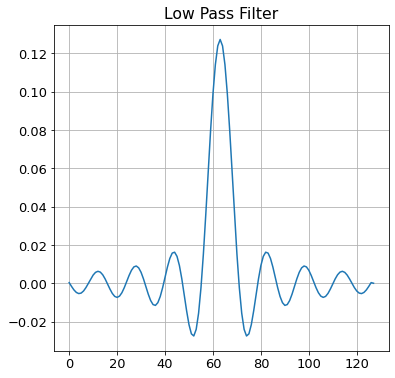

In [3]:
demo_lpf(0.4, 127)

----

# Sol

In [4]:
def AMP(Nm, x, Nx):
    
    Am = np.zeros((Nm,), float)
    w = np.zeros((Nm,), float)
    pi = np.pi

    for k in range(1, Nm+1):
        w[k-1] = (pi * (k-1))/(Nm-1)

        Z = np.exp(1j * w[k-1])

        amplitude = 0

        for m in range(1, Nx+1):
            amplitude += x[m-1] * (Z ** (m-1))

        Am[k-1] = abs(amplitude)
    return Am, w



def standard_conv(x, h):
    
    Nx = len(x)
    Nh = len(h)
    X = np.hstack((x, np.zeros((Nx,), float)))
    H = np.hstack((h, np.zeros((Nh,), float)))
    
    
    Ny = Nx + Nh - 1
    y = np.zeros((Ny,), float)

    for p in range(Ny):
        for q in range(Nh):
            if (p - q + 1 > 0):
                y[p] += H[q] * X[ p - q]
                
    return y

----
## Task 1: Design a Filter

In [5]:
wc = .4
Nh = 127
nd = (Nh + 1) // 2

In [6]:
h = np.zeros((Nh+1, ), float)

for n in range(1, Nh + 1):
    if n == nd:
        h[n - 1] = wc / pi
    else:
        h[n - 1] = np.sin( wc * (n - nd)) / (pi * (n - nd))


In [7]:
amp, w = AMP( 4 * (Nh+1), h, (Nh+1))

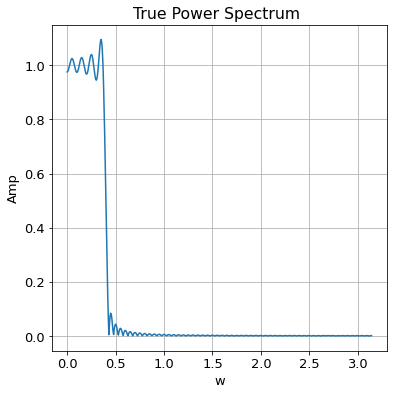

In [8]:
plt.plot(w, amp)
plt.title('True Power Spectrum ')
plt.xlabel('w')
plt.ylabel('Amp')
plt.show()

Using filter h to create colored noise


In [9]:
K = 4 * 64
M = 129
N = K * M

In [10]:
np.random.seed(12)
e = np.random.randn(N-Nh,)

In [11]:
x = standard_conv(e, h)

----
## Task 2: Bartlett's Estimate

In [12]:
Pxx = np.zeros( ((M + 1)//2,), float )
xk = np.zeros( (M,), float)

for k in range(1, K + 1):
    for n in range(1, M + 1):
        xk[n - 1] = x[ n - 1 + (k - 2) * M ]
        
    Xk = np.fft.fft(xk)
    
    for m in range(1, (1 + M )// 2 + 1):
        Pxx[m - 1] +=  abs(Xk[m-1])** 2 / M
        
Pxx /= K

In [13]:
freq = np.arange(0, pi, 2*pi/len(xk))

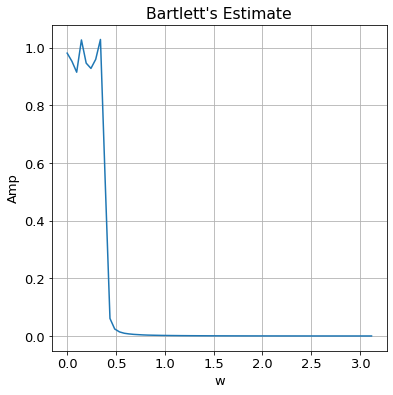

In [14]:
plt.plot(freq, Pxx)
plt.xlabel('w')
plt.ylabel('Amp')
plt.title('Bartlett\'s Estimate')
plt.show()

### Comparing

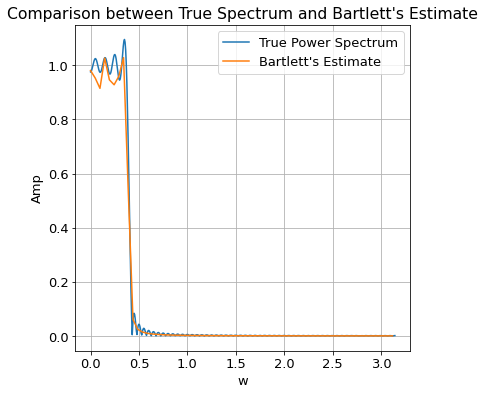

In [15]:
plt.plot(w, amp)
plt.plot(freq, Pxx)
plt.title('Comparison between True Spectrum and Bartlett\'s Estimate')
plt.xlabel('w')
plt.ylabel('Amp')
plt.legend(['True Power Spectrum', 'Bartlett\'s Estimate'])
plt.show()